In [2]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install opencv-python==4.5.5.62

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60.4 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


In [4]:
from google.colab.patches import cv2_imshow   # 코랩에서 실행이 안되기때문에

In [7]:
import cv2
import numpy as np

# 이미지 처리

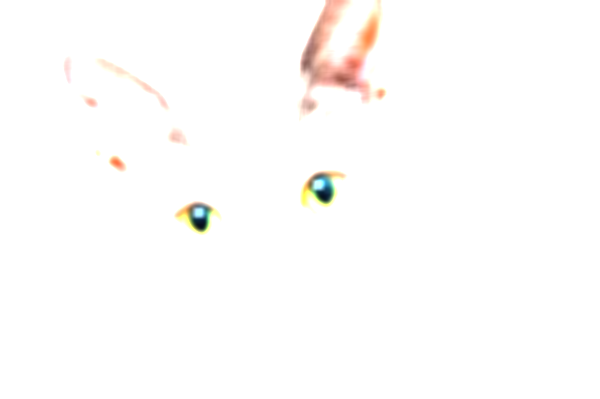

In [13]:
# 이미지 blur 처리
# filter 2d() 메소드 사용

def image_show(image):
    cv2_imshow(image)
    # cv2.waitKey(0)

# 이미지 경로
image_path = "./cat.jpg"

# 이미지 읽기 처리
image = cv2.imread(image_path)

# 커널 생성 처리
kernel = np.ones((10, 10)) / 25.0  # 모두 더하면 1이 되도록 정규화
image_kernel = cv2.filter2D(image, -1, kernel)
image_show(image_kernel)

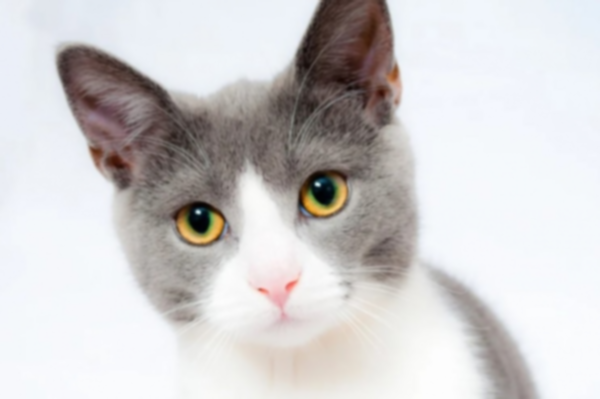

In [15]:
# 가우시안 블러

# 이미지 읽기
image = cv2.imread(image_path)

image_g_blury = cv2.GaussianBlur(image, (5, 5), 0)
image_show(image_g_blury)


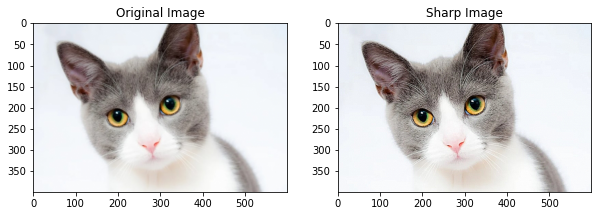

In [16]:
# 이미지 선명하게 표현
import matplotlib.pyplot as plt

image_path = './cat.jpg'

# 이미지 선명하게 ( 커널 생성 : 대상이 있는 픽셀을 강조)
image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)

# RGB 타입으로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 커널 생성
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# 커널 적용
image_sharp = cv2.filter2D(image_rgb, -1, kernel)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[1].imshow(image_sharp)
ax[1].set_title("Sharp Image")
plt.show()

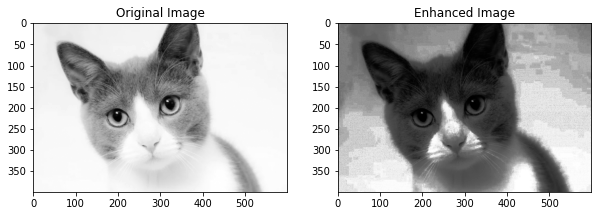

In [17]:
# 흑백 이미지 대비 높이기
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_enhanced = cv2.equalizeHist(image_gray)

# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(image_enhanced, cmap='gray')
ax[1].set_title("Enhanced Image")
plt.show()


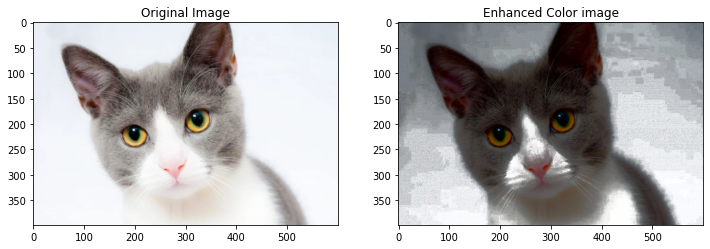

In [18]:
# 컬러 이미지 대비 높이기
# 방법 : RGB -> YUV 컬러 포맷으로 변환 -> equlizeHist() -> RGB
# BGR
image_bgr = cv2.imread(image_path)
# RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# YUV
image_yuv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YUV)
# 히스토그램 평활화 적용
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# RGB 변경
image_rgb_temp = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[1].imshow(image_rgb_temp)
ax[1].set_title("Enhanced Color image")
plt.show()

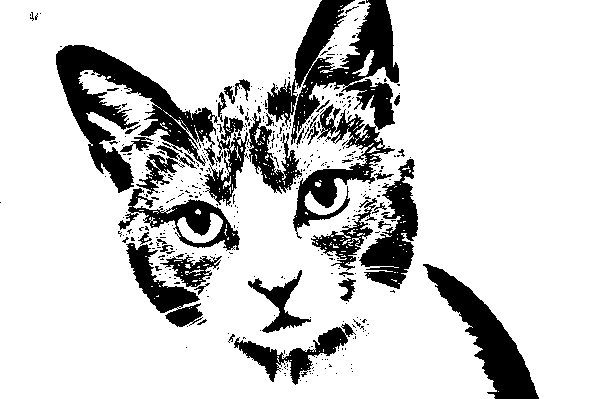

In [19]:
# 이미지 이진화
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 5

image_binary = cv2.adaptiveThreshold(image_gray, max_output_value,
                                     cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, neighborhood_size,
                                     subtract_from_mean)

image_show(image_binary)

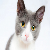

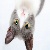

-1

In [55]:
# 이미지 Rotate

# 이미지 읽기
image_path = "./cat.jpg"
image = cv2.imread(image_path)
img_50x50 = cv2.resize(image, (50,50))

# 이미지 좌우 및 상하 반전
# 1 좌우 반전 0 상하 반전
dst_tmep1 = cv2.flip(img_50x50, 1)
dst_tmep2 = cv2.flip(img_50x50, 0)

cv2_imshow(dst_tmep1)
cv2_imshow(dst_tmep2)

# img90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)  # 시계 방향 으로 90도 회전
# img180 = cv2.rotate(image, cv2.ROTATE_180)  # 180도 회전
# img270 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
# # 반시계 방향으로 90도 회전 = 시계방향 270도 회전
# print(image.shape)
# print(img90.shape)
# print(img270.shape)
# cv2.imshow("orginal image", image)
# cv2.imshow("rotate_90", img90)
# cv2.imshow("rotate_180", img180)
# cv2.imshow("rotate_270", img270)

(500, 500, 3)


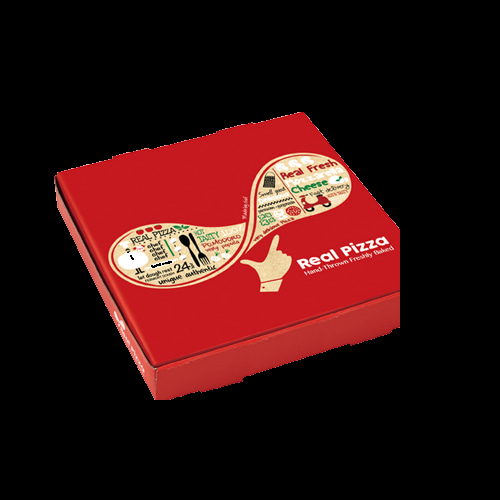

In [20]:
# 배경 제거

image_path = "./test.jpg"
# 이미지 읽기
image = cv2.imread(image_path)
print(image.shape)

# 사각형 좌표 : 사각점의 x y  넓이 높이
rectangle = (0, 0, 400, 400)

# 초기 마스크 생성
mask = np.zeros(image.shape[:2], np.uint8)

# grabCut 에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
# image -> 원본 이미지 , bgdModel -> 배경을 위한 임시 배열 fgdModel-> 전경배경 ,
# 5- > 반복횟수 cv2.GC_INIT_WITH_RECT -> 사각형 초기화
cv2.grabCut(image, mask, rectangle, bgdModel,
            fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# 배경인 곳은 0 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크 곱해서 -> 배경 제외
image_rgb_nobg = image * mask_2[:, :, np.newaxis]
image_show(image_rgb_nobg)


(710, 710, 3)


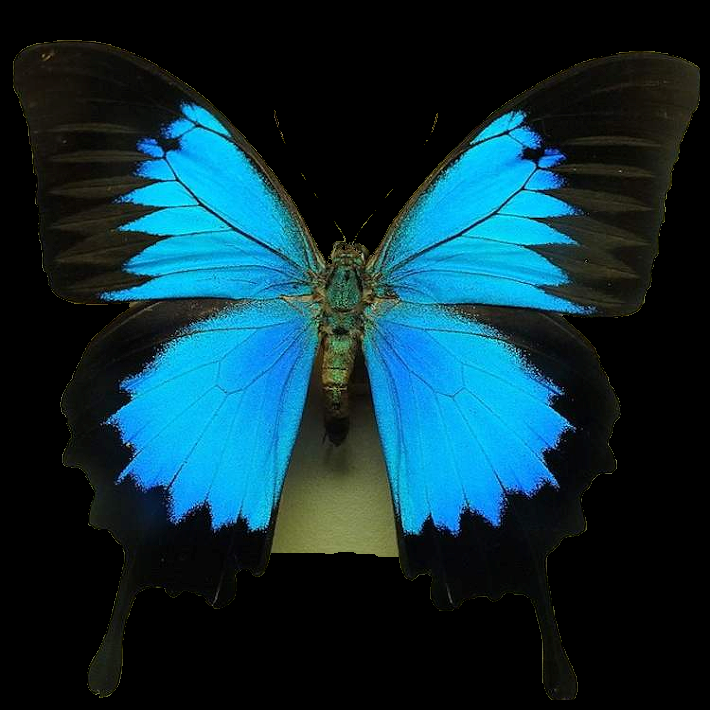

In [26]:
image_path = "./BB.png"
# 이미지 읽기
image = cv2.imread(image_path)
print(image.shape)

# 사각형 좌표 : 사각점의 x y  넓이 높이
rectangle = (0, 0, 700, 700)

# 초기 마스크 생성
mask = np.zeros(image.shape[:2], np.uint8)

# grabCut 에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
# image -> 원본 이미지 , bgdModel -> 배경을 위한 임시 배열 fgdModel-> 전경배경 ,
# 5- > 반복횟수 cv2.GC_INIT_WITH_RECT -> 사각형 초기화
cv2.grabCut(image, mask, rectangle, bgdModel,
            fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# 배경인 곳은 0 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크 곱해서 -> 배경 제외
image_rgb_nobg = image * mask_2[:, :, np.newaxis]
image_show(image_rgb_nobg)


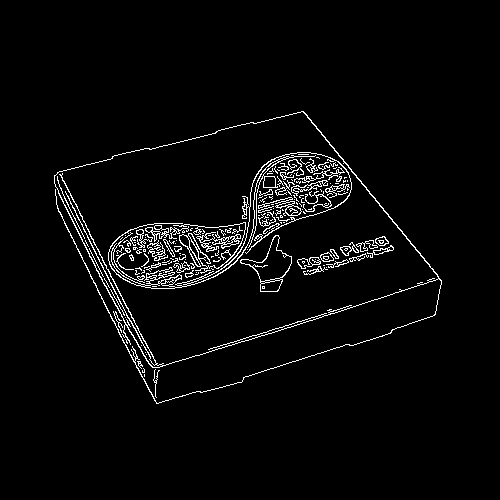

In [29]:
# 경계선 찾기 1

def im_show(image):
  cv2_imshow(image)

# 이미지 읽기
image = cv2.imread("./test.jpg")

# 경계선 찾기
image_gray = cv2.imread("./test.jpg", cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1표준편차 떨어진 값을 임계값으로 설정
lower_threshold = int(max(0,(1.0-0.33)*median_intensity))
upper_threshold = int(min(0,(1.0-0.33)*median_intensity))

# Canny edge detection 적용
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
im_show(image_canny)

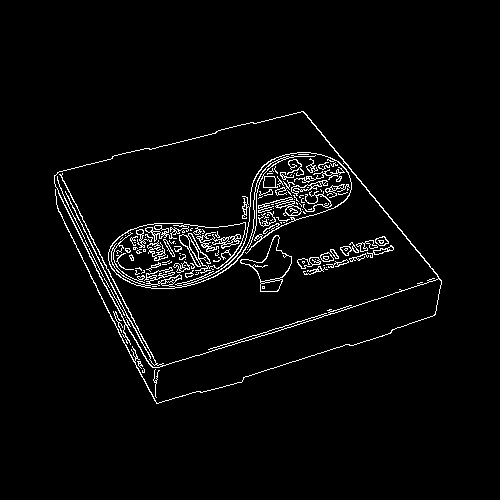

In [35]:
# 경계선 찾기 2

def im_show(image):
  cv2_imshow(image)

# 이미지 읽기
image = cv2.imread("./test.jpg")

# 경계선 찾기
image_gray = cv2.imread("./test.jpg", cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1표준편차 떨어진 값을 임계값으로 설정
lower_threshold = int(max(0,(1.0-0.01)*median_intensity))
upper_threshold = int(min(0,(1.0-0.01)*median_intensity))

# Canny edge detection 적용
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
im_show(image_canny)

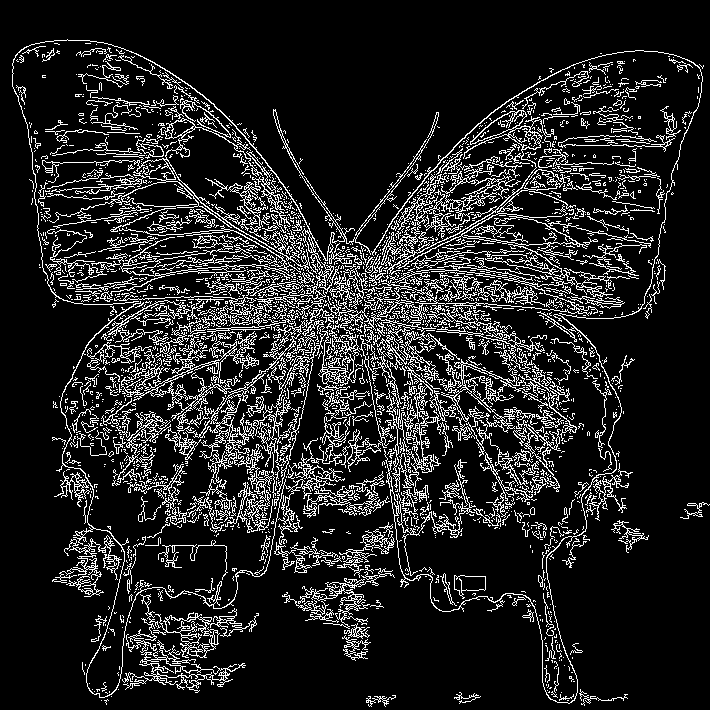

In [30]:
# 경계선 찾기 ex

def im_show(image):
  cv2_imshow(image)

# 이미지 읽기
image = cv2.imread("./BB.png")

# 경계선 찾기
image_gray = cv2.imread("./BB.png", cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1표준편차 떨어진 값을 임계값으로 설정
lower_threshold = int(max(0,(1.0-0.33)*median_intensity))
upper_threshold = int(min(0,(1.0-0.33)*median_intensity))

# Canny edge detection 적용
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
im_show(image_canny)

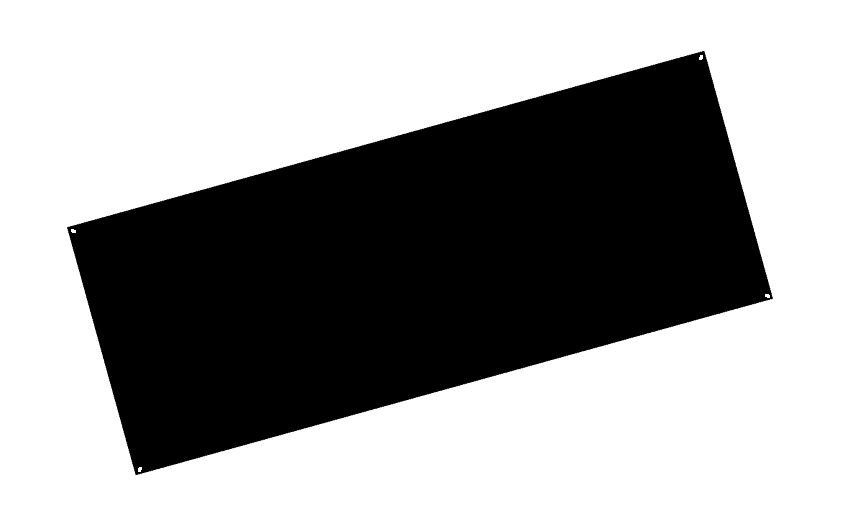

In [45]:
# 모서리 감지

def im_show(image):
  cv2_imshow(image)

# 이미지 읽기
image = cv2.imread("./Edge Detection.png")

# 모서리 찾기
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

block_size = 2    # 모서리 감지 매개변수 설정
aperture = 29
free_parameter = 0.04

detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)   # 모서리 감지
detector_responses = cv2.dilate(detector_responses, None)   # 모서리 표시를 부각시킵니다.

# 임계값보다 큰 감지 결과만 남기고 흰색으로 표시
threshold = 0.02
image[detector_responses > 
      threshold *
      detector_responses.max()] = [255,255,255]

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)      # 흑백으로 변환
im_show(image_gray)

[[[765. 295.]]

 [[ 75. 231.]]

 [[701.  55.]]

 [[139. 471.]]]


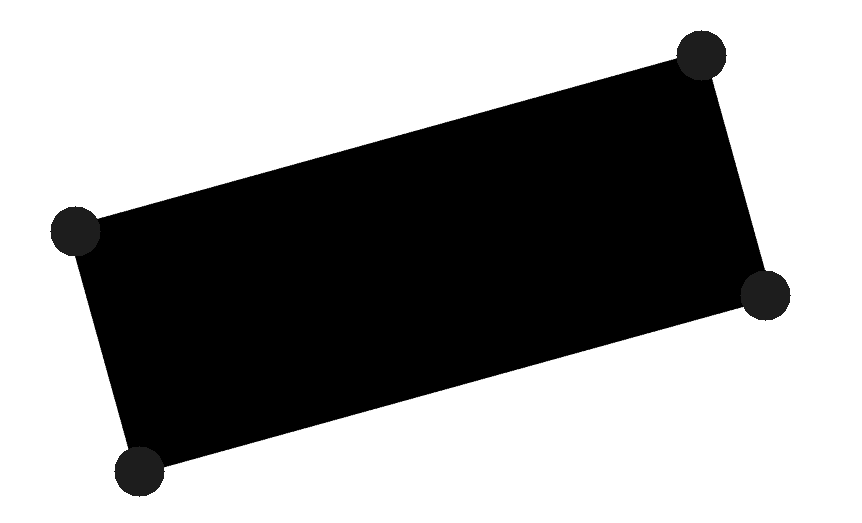

In [46]:
# 감지된 모서리에 원 처리하기
# 감지할 모서리 개수 설정

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
corners_to_detect = 4
minimum_quality_score = 0.05
minimum_distance = 25

corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance)   # 모서리 감지
corners = np.float32(corners)
print(corners)
for corner in corners:
  x, y =corner[0]
  cv2.circle(image, (int(x), int(y)), 25, (255,0,0), -1 )    # 모서리마다 흰 원을 그립니다.

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   # 흑백 이미지로 변환

im_show(image_rgb)

In [47]:
# 머신러닝 특성 만들기

image_path = "./BB.png"
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 이미지를 10x10 픽셀 크기로 변환
img_10x10 = cv2.resize(image_gray, (10,10))

# 이미지 데이터를 1차원 벡터로 flatten
img_10x10.flatten()

im_show(img_10x10)

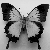

In [48]:
# 이미지를 50x50 픽셀 크기로 변환
img_50x50 = cv2.resize(image_gray, (50,50))

# 이미지 데이터를 1차원 벡터로 flatten
img_50x50.flatten()

im_show(img_50x50)

In [49]:
# 컬러 이미지 10x10
image_path = "./BB.png"
image_color = cv2.imread(image_path)
img_10x10 = cv2.resize(image_color, (10,10))

img_10x10.flatten()
im_show(img_10x10)

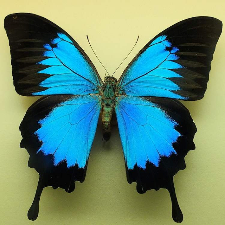

In [50]:
# 컬러 이미지 225x225
image_path = "./BB.png"
image_color = cv2.imread(image_path)
img_225x225 = cv2.resize(image_color, (225,225))

img_225x225.flatten()
im_show(img_225x225)

In [51]:
# flatten 예제
# numpy에서 제공하며 다차원배열을 값이 담긴 벡터로 변환

x = np.array([[51,40],[14,19],[10,7]])  # 2차원 배열
x = x.flatten()
# 결과 예측 [51, 40, 14, 19, 10, 7]
print(x)

[51 40 14 19 10  7]


[[100.30014815 136.33465679 115.37362963]]


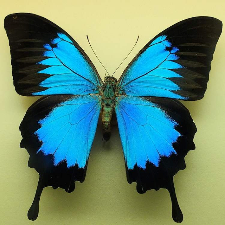

In [58]:
# 평균 색을 특성으로 인코딩
image = cv2.imread("./BB.png")
img = cv2.resize(image, (225,225))
channels = cv2.mean(img)    # 각 채널의 평균을 계산

# 파랑과 빨강을 바꾼다(BGR에서 RGB로 만들기)
observation = np.array([(channels[2], channels[1],channels[0])])
observation     # 채널 평균값을 확인
print(observation)
im_show(img)

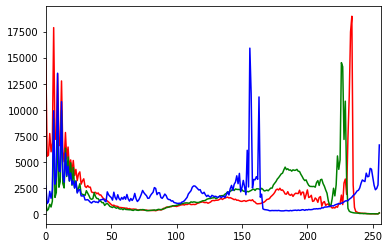

[14776.  5545.  5642.  7725.  5970.]


array([231, 219, 143], dtype=uint8)

In [60]:
# 컬러 히스토그램을 특성으로 인코딩
image_path = "./BB.png"
image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)    # RGB로 변환
features = []   # 특성 값을 담을 리스트
colors = ("r","g","b")    # 각 컬러 채널에 대해 히스토그램 계산

# 각 채널을 반복하면서 히스토그램을 계산하고 리스트에 추가//그래프를 그림
for i, channel in enumerate(colors): # 각 컬러 채널에 대한 히스토그램을 계산
  # cv2.calHist([이미지],[채널인덱스],[마스크],[히스토그램크기],[범위])
  histogram = cv2.calcHist([image_rgb],   # 이미지
                           [i],           # 채널 인덱스
                           None,          # 마스크 없음
                           [256],         # 히스토그램 크기
                           [0,256])       # 범위
  features.extend(histogram)
  plt.plot(histogram, color =channel)
  plt.xlim([0, 256])
plt.show()    # 그래프 출력

observation = np.array(features).flatten()    # 샘플의 특성 값으로 벡터 생성
observation[0:5]
print(observation[0:5])
image_rgb[0,0]    # RGB 채널 값을 확인

## 기본적인 이미지 처리기술을 이용한 이미지 선명처리

### 이미지 필터링
      실제로 원본 이미지를 선명하게 하거나 흐리게 만드는데 사용할 작은 매트릭스

### openCV에서 이미지를 매끄럽게 만드는 방법
      이미지 임계값 및 가장자리 감지에 사용
      블러링 기술은 일반적으로 노이즈를 줄이는데 사용
      저해상도 이미지에서 픽셀효과를 줄이는데 사용

### 평균화 필터
      컨볼루션 연산자를 적용해서 평균화 필터 처리
      필터 크기가 커질수록 이미지가 더 흐려진다
$$F(x, y) * H(u, v) = G(x, y)$$
$$G = F*H$$

      OpenCV에서 평균화를 수행하기 위해 cv2.blur()와 cv2.boxFilter() 함수를 모두 사용
      이미지와 필터크기 두 개의 인자가 요구됨
      필터 결과가 결합되어 함수와 함께 쌓임
      np.hstack() = 배열을 앞으로 결합하고 싶을때 사용

(640, 960)


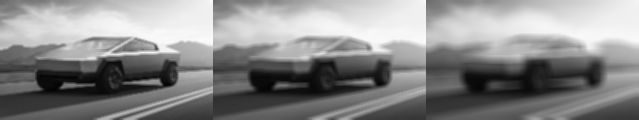

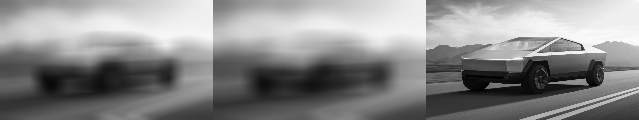

In [68]:
image = cv2.imread('./car.jpg',0)
print(image.shape)  # (640, 960) 크기 확인
img = cv2.resize(image, (213,120))

# 기본적인 이미지 처리 기술을 이용한 이미지 선명화 1
# 블러처리: 이미지를 매끄럽게(노이즈 제거가 목표)

blurred_1 = np.hstack([cv2.blur(img, (3,3)), cv2.blur(img, (5,5)), cv2.blur(img, (9,9))])
blurred_2 = np.hstack([cv2.blur(img, (15,15)), cv2.blur(img, (20,20)), cv2.blur(img, (1,1))])

cv2_imshow(blurred_1)
cv2_imshow(blurred_2)

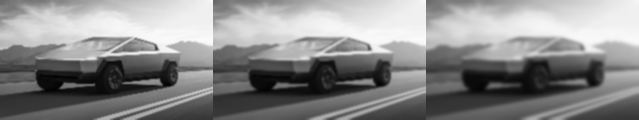

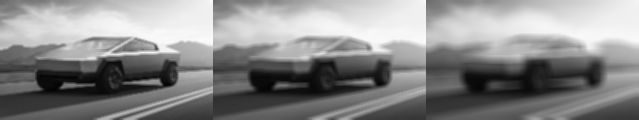

In [71]:
# 기본적인 이미지 처리 기술을 이용한 이미지 선명화 2
# 가우시안 필터 적용

Gaussian_blurred_1 = np.hstack([
    cv2.GaussianBlur(img,(3,3),0),
    cv2.GaussianBlur(img,(5,5),0),
    cv2.GaussianBlur(img,(9,9),0)])

cv2_imshow(Gaussian_blurred_1)
cv2_imshow(blurred_1)

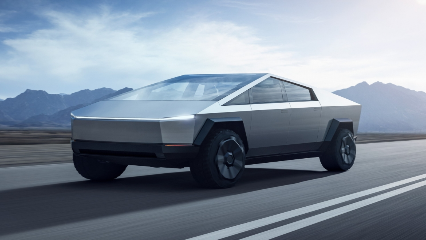

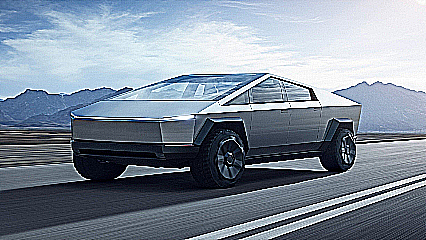

In [76]:
# 기본적인 이미지 처리 기술을 이용한 이미지 선명화 3
# cv2.filter2D 3X3필터 적용
img1 = cv2.imread('./car.jpg',1)
img2 = cv2.resize(img1, (426,240))
# Creating our sharpening filter
filter1 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

#Applying cv2.filter2D function on our Cybertruck image
sharpen_img_1 = cv2.filter2D(img2, -1, filter1)

cv2_imshow(img2)
cv2_imshow(sharpen_img_1)

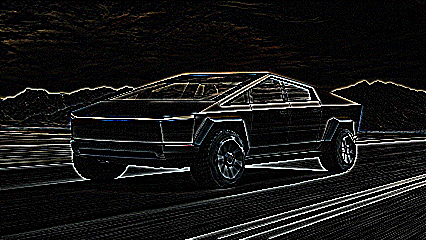

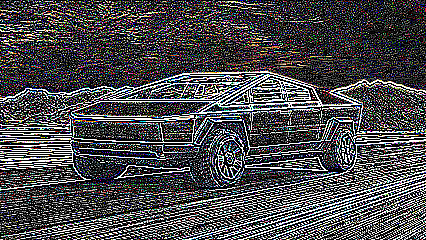

In [78]:
# 기본적인 이미지 처리 기술을 이용한 이미지 선명화 3
# Creating maxican hat filter
filter2 = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
# Applying cv2.filter2D function on our Cybertruck image
mexican_hat_img1 = cv2.filter2D(img2, -1, filter2)
mexican_hat_img2 = cv2.filter2D(sharpen_img_1, -1, filter2)

cv2_imshow(mexican_hat_img1)
cv2_imshow(mexican_hat_img2)   # 샤프닝 필터를 적용한 결과에 멕시칸 햇 적용

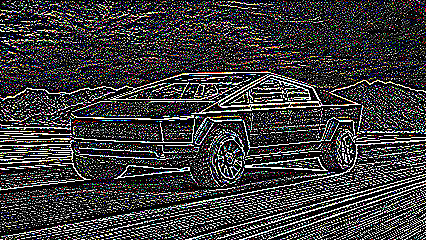

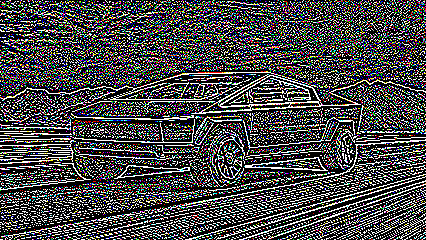

In [79]:
# maxican hat filter 두번 세번 적용해보기
mexican_hat_img2 = cv2.filter2D(mexican_hat_img1, -1, filter2)
mexican_hat_img3 = cv2.filter2D(mexican_hat_img2, -1, filter2)

cv2_imshow(mexican_hat_img2)
cv2_imshow(mexican_hat_img3)

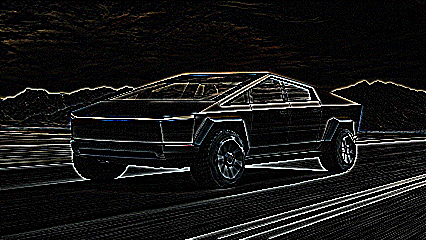

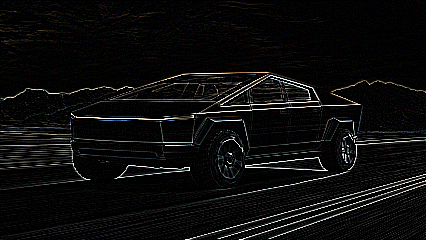

In [80]:
# 기본적인 이미지 처리 기술을 이용한 이미지 선명화 4
# 라플라시안 마스크 3x3, 5x5 비교

filter3 = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
filter4 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
# Applying cv2.filter2D function on our Cybertruck image
mexican_hat_img1 = cv2.filter2D(img2, -1, filter3)
mexican_hat_img2 = cv2.filter2D(img2, -1, filter4)

cv2_imshow(mexican_hat_img1)    #  5x5
cv2_imshow(mexican_hat_img2)    #  3x3

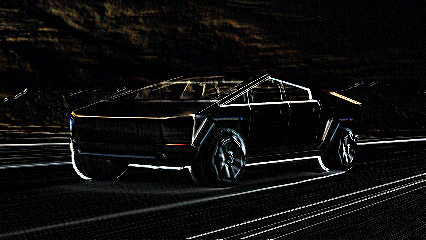

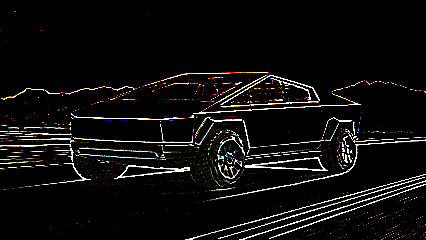

In [90]:
# 기본적인 이미지 처리 기술을 이용한 이미지 선명화 5
# Custom filter 생성
filter5 = np.array([[3,-2,-3],[-4,8,-6],[5,-1, 0]])
filter6 = np.array([[0,-1,-3,-1,0],[-1,-3,-5,-3,-1],[-3,-5,49,-5,-3],[-1,-3,-5,-3,-1],[0,-1,-3,-1,0]])

# Applying cv2.filter2D function on our Cybertruck image
custom_img_1 = cv2.filter2D(img2, -1, filter5)
custom_img_2 = cv2.filter2D(img2, -1, filter6)
cv2_imshow(custom_img_1)
cv2_imshow(custom_img_2)

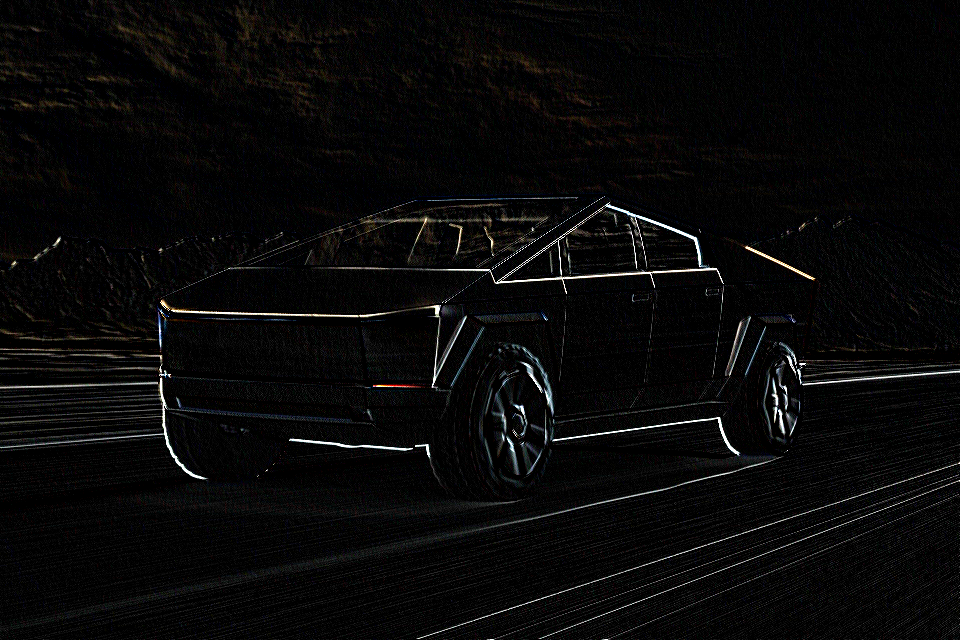

In [93]:
# Custom_filter를 원본에 적용해보기 ex
custom_img_3 = cv2.filter2D(img1, -1, filter5)

cv2_imshow(custom_img_3)

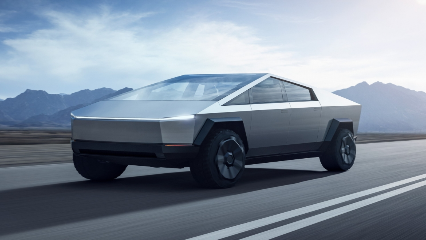

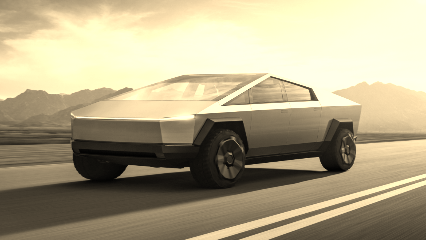

In [92]:
# 기본적인 이미지 처리 기술을 이용한 이미지 선명화 6
# Creating our Sepia filter
filter7 = np.array([[0.272,0.534,0.131],
                   [0.349,0.686,0.168],
                   [0.393,0.769,0.189]])
# Applying cv2.transform function
sepia_img=cv2.transform(img2, filter7)
cv2_imshow(img2)
cv2_imshow(sepia_img)

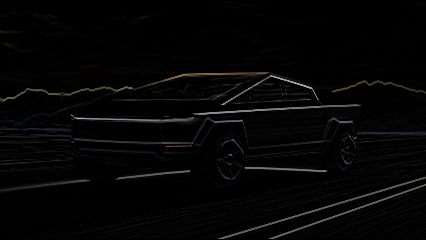

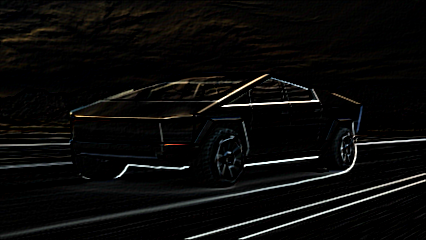

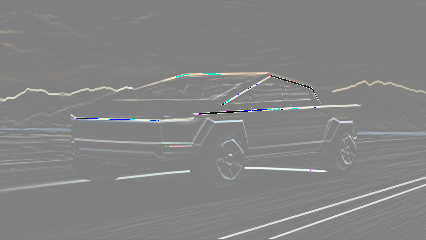

In [99]:
# 기본적인 이미지 처리 기술을 이용한 이미지 선명화 7
# Creating our Emboss filter
filter8 = np.array([[0,1,0],[0,0,0],[0,-1,0]])
filter9 = np.array([[-1,-1,0],[-1,0,1],[0,1,1]])
# Applying cv2.filter2D Emboss
emboss_img1 = cv2.filter2D(img2,-1, filter8)
emboss_img2 = cv2.filter2D(img2,-1, filter9)
emboss_img3 = emboss_img1 +128
cv2_imshow(emboss_img1)
cv2_imshow(emboss_img2)
cv2_imshow(emboss_img3)

## 이미지 형태학적 변환

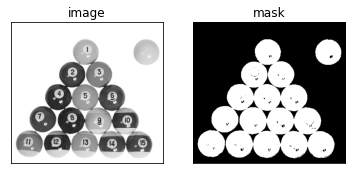

In [108]:
# 확장, 침식 실험 예시

# Loading an input image and performing thresholding -> gray
image = cv2.imread('./Billiards.png', cv2.IMREAD_GRAYSCALE)

# 임계값 연사자의 출력을 마스크변수에 저장
# 저장하지 않을 출력 매개변수도 있을경우 코드(_) 밑줄 사용
"""
우리가 사용하는 추가 매개변수는 임계 강도 픽셀 값이며, 이 경우에는 230과 255값으로 설정됩니다.
이는 230보다 큰 모든 값이 255 값으로 설정됨을 의미합니다. 우리가 사용하는 마지막 매개변수를 유형입니다.
단순히 값을 반전시키는 임계값 알고리즘 THESH_BINARY_INV(230보다 작는 모든 값은 흰색, 230보다 큰 모든값은 검은색)
"""
_, mask=cv2.threshold(image, 230, 255, cv2.THRESH_BINARY_INV)

titles =["image", "mask"]
images=[image, mask]

# Plotting the image and the mask
for i in range(2):
  plt.subplot(1,2, i+1), plt.imshow(images[i], "gray")
  plt.title(titles[i]), plt.xticks([]), plt.yticks([])
plt.show()

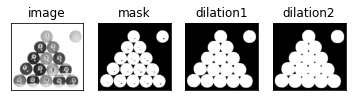

In [113]:
# 확장, 침식 실험 예시 2
# Creating 3x3, 5x5 kernel
kernel1 = np.ones((3,3), np.uint8)
kernel2 = np.ones((5,5), np.uint8)
# Performing dilation on the mask
dilation1 = cv2.dilate(mask, kernel1)
dilation2 = cv2.dilate(mask, kernel2)

titles1 =["image", "mask", "dilation1","dilation2"]
images1=[image, mask, dilation1, dilation2]

# Plotting the image and the mask
for i in range(4):
  plt.subplot(1,4, i+1), plt.imshow(images1[i], "gray")
  plt.title(titles1[i]), plt.xticks([]), plt.yticks([])
plt.show()


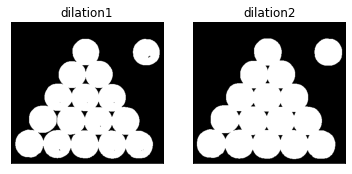

In [114]:
# 3x3, 5x5 kernel 차이 비교
titles2 =["dilation1","dilation2"]
images2=[dilation1, dilation2]

for i in range(2):
  plt.subplot(1,2, i+1), plt.imshow(images2[i], "gray")
  plt.title(titles2[i]), plt.xticks([]), plt.yticks([])
plt.show()

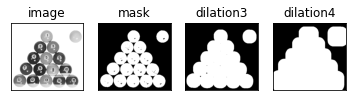

In [119]:
# 확장, 침식 실험 예시 3
# 팽창 두 번 이상 적용

# Creating 5x5 kernel
kernel2 = np.ones((5,5), np.uint8)
# Performing dilation on the mask
dilation3 = cv2.dilate(mask, kernel2, iterations=2)
dilation4 = cv2.dilate(mask, kernel2, iterations=10)

titles2 =["image", "mask", "dilation3","dilation4"]
images2=[image, mask, dilation3, dilation4]

# Plotting the image and the mask
for i in range(4):
  plt.subplot(1,4, i+1), plt.imshow(images2[i], "gray")
  plt.title(titles2[i]), plt.xticks([]), plt.yticks([])
plt.show()